# Task 5 Explore Business Analytics
### Topic: Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
## By [Lakshya Bansal](http://www.lakshyabansal.me/)

**Loading Dependencies**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import iqr

**Loading Data**

In [134]:
data_df=pd.read_csv("SampleSuperstore.csv")
data_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Wrangling

Renaming column names

In [135]:
data_df.columns=data_df.columns.str.replace(' |-','_')

In [136]:
data_df.shape

(9994, 13)

In [137]:
data_df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [138]:
data_df.isna().sum()

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Observation: No null values

## Data Cleaning

Dropping the useless columns

In [139]:
data_df.drop(['Postal_Code'],axis=1,inplace=True)

In [140]:
data_df.duplicated().sum()

50

Droping the duplicate data(rows)

### Visualizing the dataset

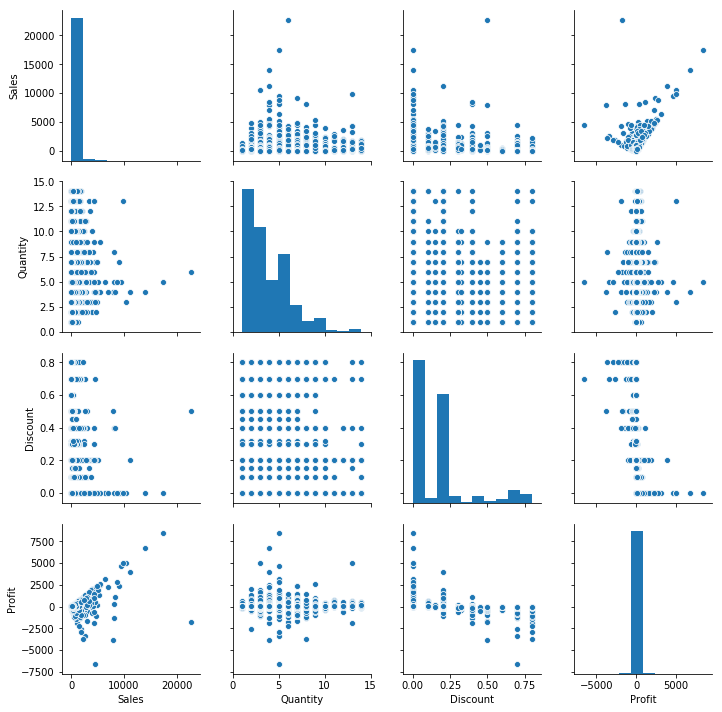

In [141]:
sb.pairplot(data_df)
plt.show()

As it is clearly visible their are outliers in our dataset so we have to remove them in order to have more accurate result.

**Dealing with outliers**

In [144]:
def remove_outlier(column_name):
    iqr_val=iqr(data_df[column_name])
    ll=np.quantile(data_df[column_name],0.25)-1.5*iqr_val
    ul=np.quantile(data_df[column_name],0.75)+1.5*iqr_val
    count=0
    median=np.median(data_df[column_name])
    for i in range(data_df.shape[0]):
        value=data_df.get_value(i,column_name)
        if(value>ul or value<ll):
            data_df.loc[i,column_name]=median
            count+=1
    print("Modified {} rows while removing outliers for {}.".format(count,column_name))    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Modified 1167 rows while removing outliers for Sales.
Modified 856 rows while removing outliers for Discount.
Modified 1881 rows while removing outliers for Profit.
Modified 170 rows while removing outliers for Quantity.


<Figure size 1440x1440 with 0 Axes>

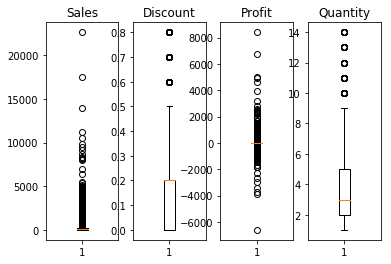

Size of dataset after removing outliers are:9994 rows


In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(1, 4)
col_arr=['Sales','Discount','Profit','Quantity']
ax_arr=[ax1,ax2,ax3,ax4]
for i in range(len(col_arr)):
    ax_arr[i].boxplot(data_df[col_arr[i]])
    ax_arr[i].set_title(col_arr[i])
    remove_outlier(col_arr[i])
plt.show()
print("Size of dataset after removing outliers are:{} rows".format(data_df.shape[0]))

<Figure size 1440x1440 with 0 Axes>

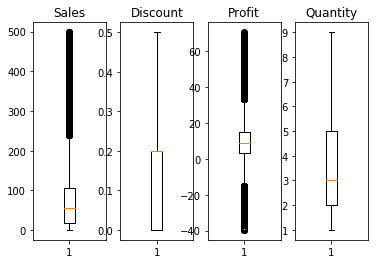

In [146]:
plt.figure(figsize=(20, 20))
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(1, 4)
col_arr=['Sales','Discount','Profit','Quantity']
ax_arr=[ax1,ax2,ax3,ax4]
for i in range(len(col_arr)):
    ax_arr[i].boxplot(data_df[col_arr[i]])
    ax_arr[i].set_title(col_arr[i])

**No outliers**

In [113]:
data_df.head()

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Defining the structure of Data

In [114]:
data_df.drop_duplicates(inplace=True)
data_df.shape

(9944, 12)

> There are 9912 records with 13 features

**Categorical Data**
- Nominal: Segment,Country, City, State, Region, Category, Sub-Category
- Ordinal: Shap Mode


**Numerical Data**
- Discrete: Quantity
- Continuus: Sales, Discount, Profit

In [115]:
data_df.head()

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploratory Data Analysis

### Which Ship mode is widely used?

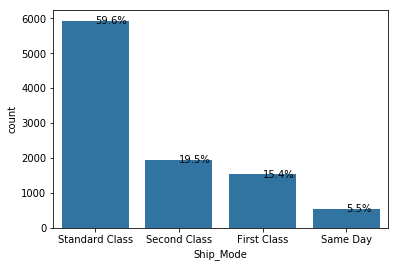

In [116]:
base_color=sb.color_palette()[0]
type_counts=data_df['Ship_Mode'].value_counts()
order=type_counts.index
for i in range(type_counts.shape[0]):
    y_position=type_counts[i]
    value='{:0.1F}%'.format(100*y_position/data_df.shape[0])
    plt.text(i,y_position,value,va='center')
sb.countplot(data=data_df,x='Ship_Mode',order=order,color=base_color)
plt.show()

> Standard Class is the most widely used ship mode.

### Which Segment has the highest sales?

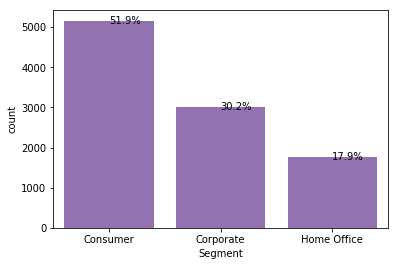

In [117]:
base_color=sb.color_palette()[0]
type_counts=data_df['Segment'].value_counts()
order=type_counts.index
for i in range(type_counts.shape[0]):
    y_position=type_counts[i]
    value='{:0.1F}%'.format(100*y_position/data_df.shape[0])
    plt.text(i,y_position,value,va='center')
sb.countplot(data=data_df,x='Segment',order=order,color=sb.color_palette()[4])
plt.show()

> Consumer segment has the sales.

### Which region has highest sales?

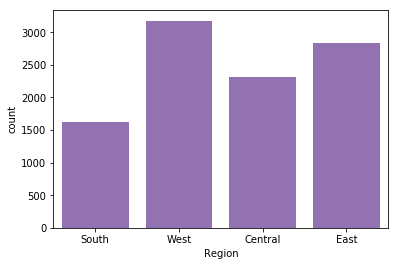

In [118]:
sb.countplot(data=data_df,x='Region',color=sb.color_palette()[4])

> West region has the highest no of sales

### Which category has the highest sale?

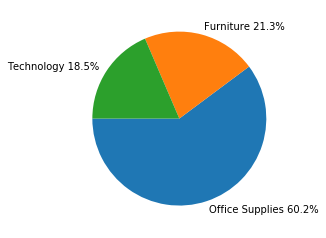

In [119]:
type_counts=data_df['Category'].value_counts()
labels=type_counts.index.values
for i in range(len(type_counts)):
    labels[i]=labels[i]+str(' {:0.1F}%'.format(100*type_counts[i]/data_df.shape[0]))
plt.pie(data_df['Category'].value_counts(), labels=labels, startangle=180, radius=1)
plt.show()

> Office Supplies has the highest sales

### Which city has highest sales?

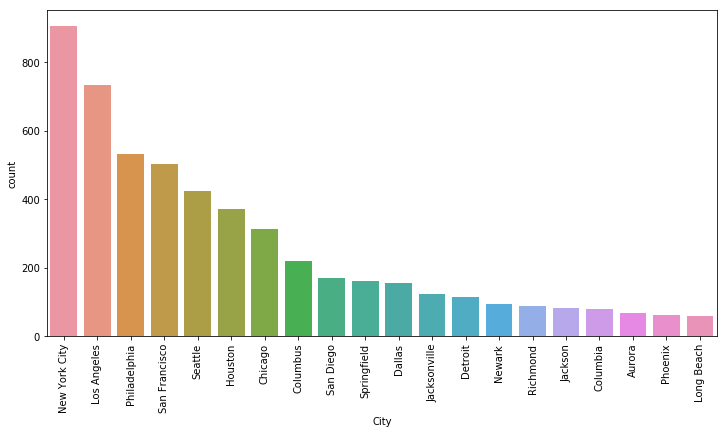

In [120]:
plt.figure(figsize=(12,6))
order=data_df['City'].value_counts().head(20).index
sb.countplot(data_df['City'],order=order)
plt.xticks(rotation=90)
plt.show()

>New York city has the highest sales that could be because New York is the city that never sleeps.

### Which sub-category has highest Profit?

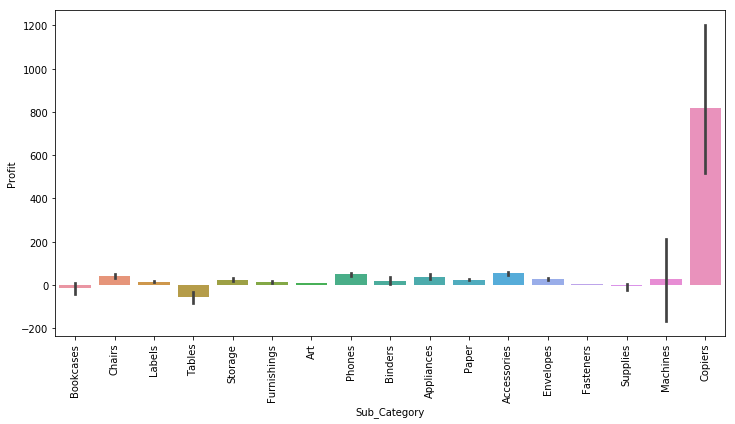

In [121]:
plt.figure(figsize=(12,6))
sb.barplot(x=data_df['Sub_Category'], y=data_df['Profit'])
plt.xticks(rotation=90)
plt.show()


## Effect on sales with respect to other features

#### Effect due to sub-category.

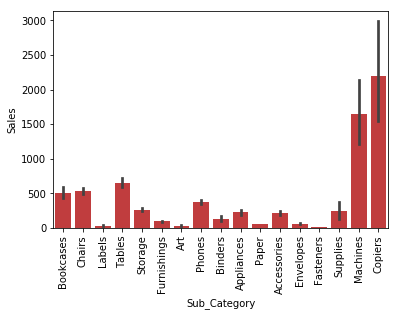

In [122]:
sb.barplot(x=data_df['Sub_Category'],y=data_df['Sales'],color=sb.color_palette()[3])
plt.xticks(rotation=90)
plt.show()

>Technology has the highest amount of sales even after having arount 18-19 % sales.

#### Effect due to Region

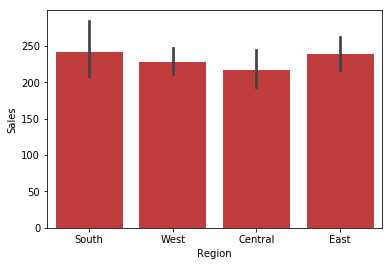

In [123]:
sb.barplot(x=data_df['Region'],y=data_df['Sales'],color=sb.color_palette()[3])
plt.show()

>West region has the highest amount of sales that because of the highest no of sales.

#### Effect due to Segment

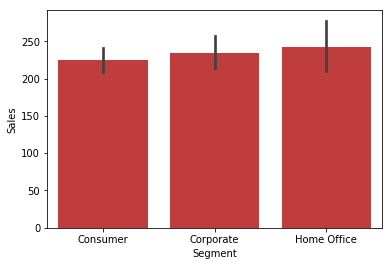

In [124]:
sb.barplot(x=data_df['Segment'],y=data_df['Sales'],color=sb.color_palette()[3])
plt.show()

>Definitely consumer will have the highst amount of sales as it has the highest no of sales.

### Effect on profit with respect to other features..

#### Effect due to Sub-category

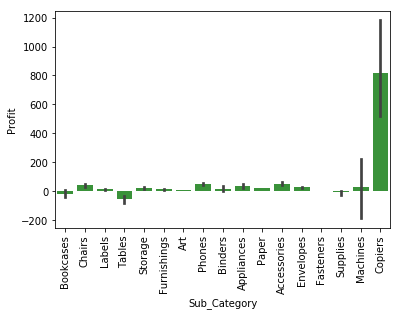

In [125]:
sb.barplot(x=data_df['Sub_Category'],y=data_df['Profit'],color=sb.color_palette()[2])
plt.xticks(rotation=90)
plt.show()

>Most of the profit is from Technology category

#### Effect due to Region

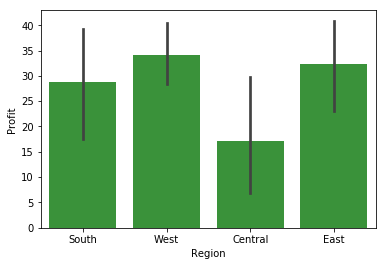

In [126]:
sb.barplot(x=data_df['Region'],y=data_df['Profit'],color=sb.color_palette()[2])
plt.show()

>West region gives the highest profit as it has the highest sale as explored above.

#### Effect due to Segment

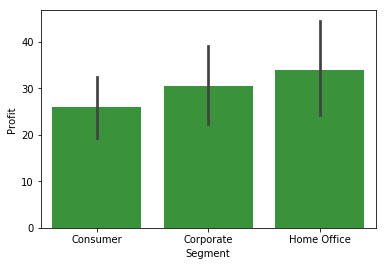

In [127]:
sb.barplot(x=data_df['Segment'],y=data_df['Profit'],color=sb.color_palette()[2])
plt.show()

>As seen Home Office has slightly more profit than the other two even after having least no of sales.

## How sales are effected by Segment, Category and Ship Mode?

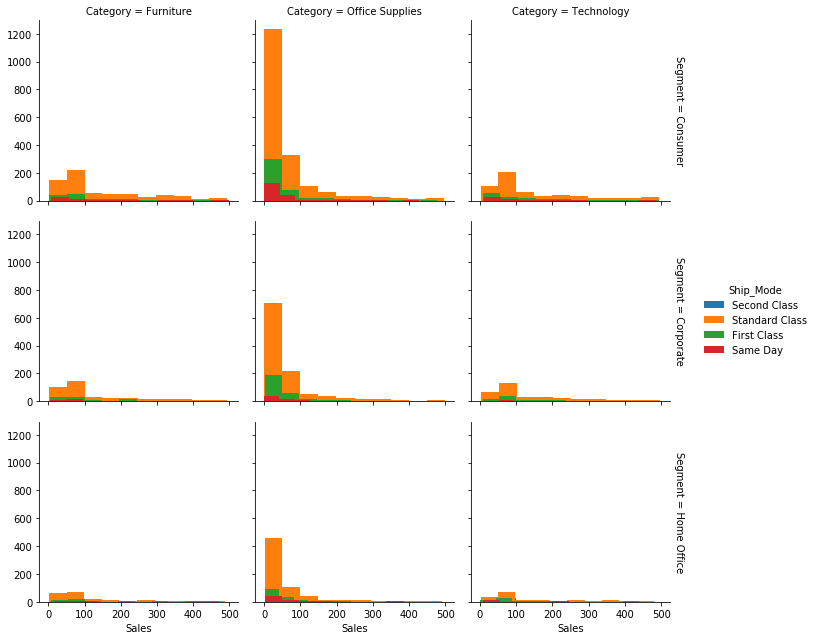

In [147]:
g=sb.FacetGrid(data_df,col='Category', row='Segment',hue='Ship_Mode',margin_titles=True, height=3, aspect=1.1)
g.map(plt.hist,'Sales')
g.add_legend() 
plt.show()

>It can be seen that consumer that ordered Office Supplies through Standard Class ship mode has the highest Sales amount.

## How profit is effected by Segment, Category and Ship Mode?


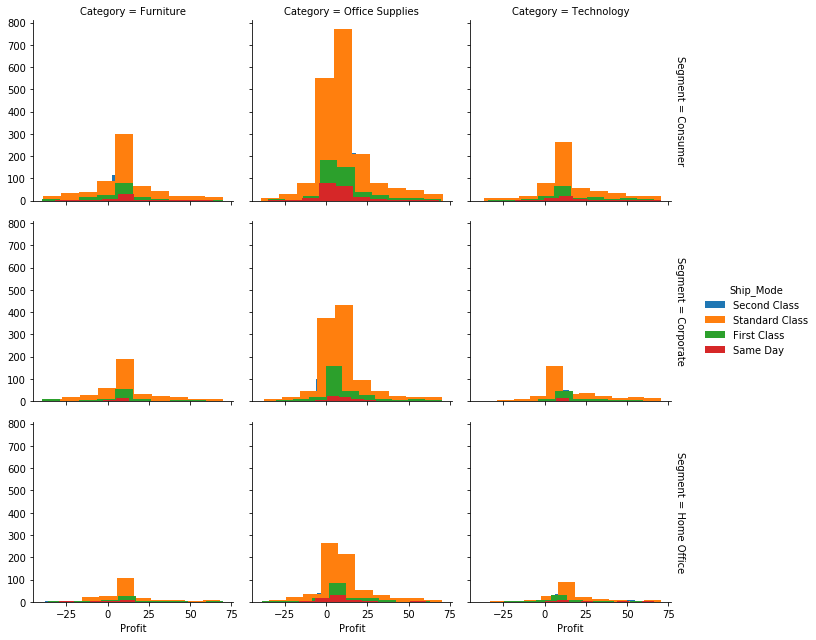

In [148]:
g=sb.FacetGrid(data_df,col='Category', row='Segment',hue='Ship_Mode',margin_titles=True, height=3, aspect=1.1)
g.map(plt.hist,'Profit')
g.add_legend() 
plt.show()

## Insights from the analysis
- Consumer segment has the highest number of purchase.
- Office Supplies is the category with highest number of sales.
- New York city has the highest number of sales.
- Copiers is the sub-category with highest profit while Tables sub-category has the lowest profit.
- Consumers who ordered office supplies through Standard Ship mode are the most valuable customers.
- Same Day Ship Mode is the least preferred Ship Mode may be because of large shipping charges.
- South and Central regions have least number of sales as well as least profit so there is need of improving marketing in these regions.
- West Region has the highest number of purchases and profit too so continuing the techniques and stradegies for these regions don't need a change.
- The Customer segment has maximum number of purchases but least profit that may be because of high discount rates on items consumed by consumer segment. 